In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


from sklearn.model_selection import train_test_split    # train, test 데이터 분할
from sklearn.linear_model import LogisticRegression, SGDClassifier # 로지스틱 회귀 분석 / 선형 분류
from sklearn.metrics import RocCurveDisplay, roc_auc_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

In [2]:
pd_data = pd.read_csv('Raisin_Dataset.CSV')

enc = LabelEncoder()
y = enc.fit_transform(pd_data["Class"])

X = pd_data[['Area', 'MajorAxisLength', 'Eccentricity', 'Perimeter']]

# sns.catplot(X)

# scaler = MinMaxScaler()
# scaler = StandardScaler()

# print(scaler.fit(X))

# X = scaler.transform(X)

# print(X)

# sns.catplot(X)


train score  0.8548148148148148
test score  0.8533333333333334


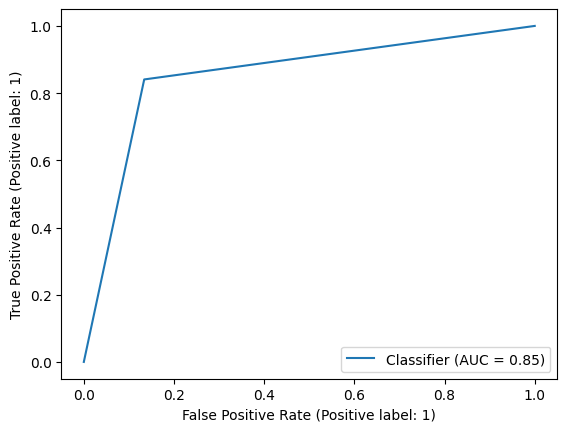

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=10)

# X_test의 경우 예상하지 못한 값으로 테스트를 진행해야 하므로 미리 스케일 조정을 하는 것보다 분리 후 적용하는 것이 옳다
# scale은 X_train과 동일하게 적용해주어야 한다!
scale = MinMaxScaler().fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

m = SGDClassifier(loss='log_loss')
m.fit(X_train, y_train)

print('train score ', m.score(X_train, y_train))
print('test score ', m.score(X_test, y_test))

RocCurveDisplay.from_predictions(y_test, m.predict(X_test))

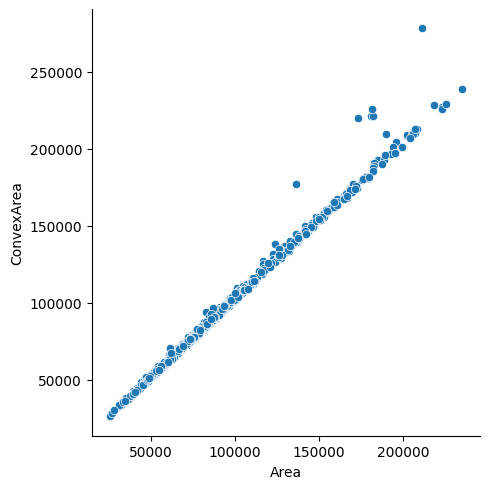

In [7]:
# print(pd_data)

sns.relplot(data=pd_data, x='Area', y='ConvexArea')

# independent variable 끼리는 상관도가 낮을수록 좋다!